# NoteBook Imports and Packages

In [105]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1
$$f(x) = x^2 + x + 1$$

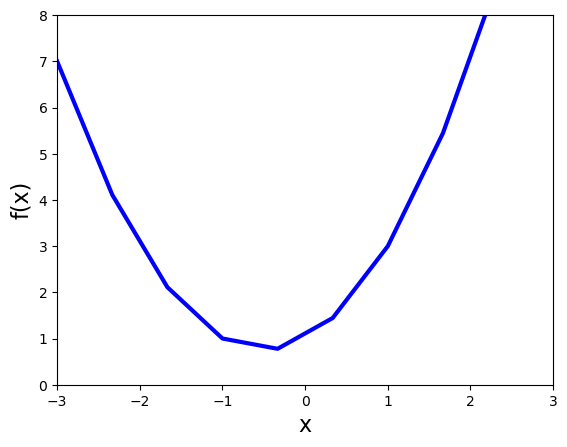

In [106]:
def f(x):
    return x**2 + x + 1

x_1 = np.linspace(start=-3, stop=3, num=10)

def plot(xlim = [-3, 3], ylim = [0, 8], xlabel = "x", ylabel = "f(x)", x_n = x_1, function = f):
    plt.xlim(xlim)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylim(ylim)
    plt.ylabel(ylabel, fontsize=16)
    plt.plot(x_n, function(x_n), color = "blue", linewidth = 3)
    
plot()


## Slope & Derivatives

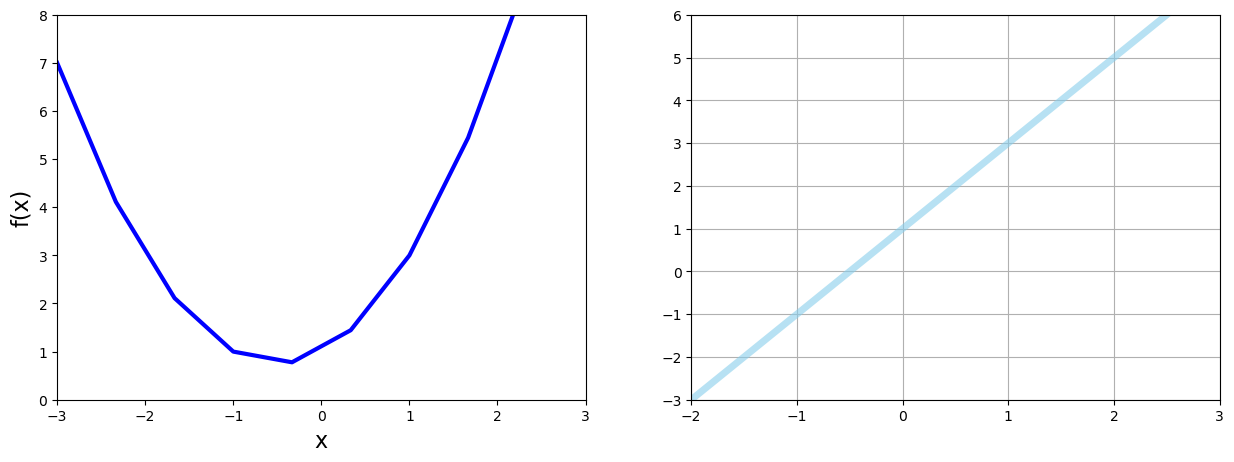

In [107]:
def df(x):
    return 2*x + 1

# Shared graph properties
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)
plot()

# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.grid()
plt.plot(x_1, df(x_1), color = "skyblue", linewidth = 5, alpha = 0.6)


## Plython Loops & Gradient Descent

In [108]:
# Python for loop
for i in range(5):
    print("Hello world", i)

# While loop
counter = 0
while counter < 7:
    print("Counting...", counter)
    counter = counter + 1

Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4
Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Counting... 5
Counting... 6


In [109]:
#Gradient Descent
new_x = 3
prev_x = 0
step_multiplier = 0.1
prec = 0.000001

x_list = [new_x]
slope_list = [df(new_x)]

for i in range(500):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - (step_multiplier * gradient)
    step_size = abs(new_x - prev_x)
    # print(step_size);

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < prec:
        print("loop ran for:", i)
        break

print("Local min occurs at:", new_x)
print("Slope or df(x) value at this point is: ", df(new_x))
print("f(x) value or cost at this point is:", f(new_x))

loop ran for: 61
Local min occurs at: -0.4999965672099885
Slope or df(x) value at this point is:  6.8655800230521535e-06
f(x) value or cost at this point is: 0.750000000011784


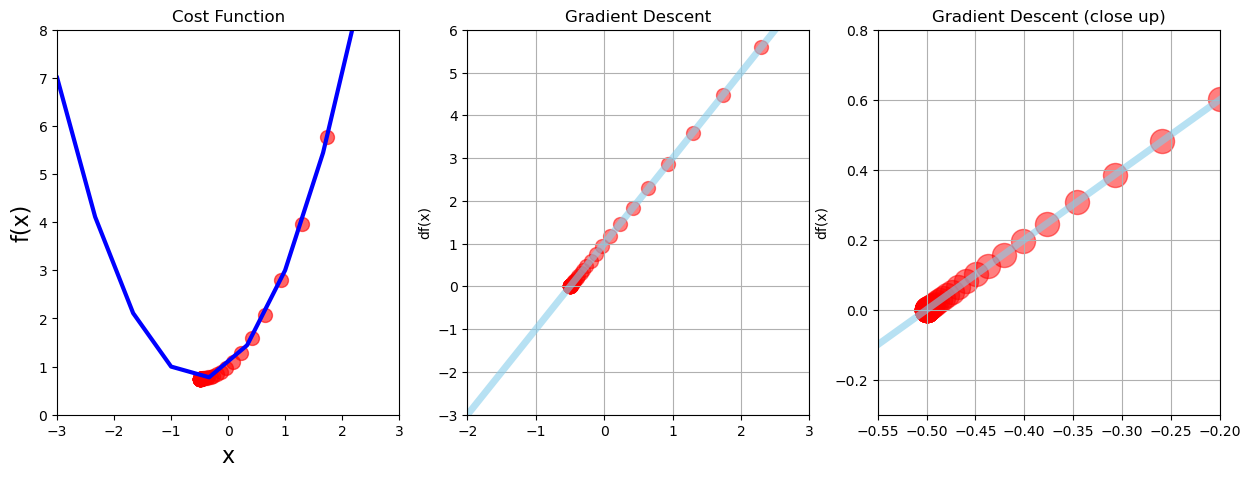

In [110]:
# Define base plot
def plotGrad(title, xlim, ylim, s = 100, ylabel = "df(x)", x_n=x_1, function=df):
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    plt.grid()
    plt.plot(x_n, function(x_n), color = "skyblue", linewidth = 5, alpha = 0.6)
    if s == False: return;
    plt.scatter(x_list, slope_list, color = "red", s = s, alpha = 0.5)

    
# Superimpose the gradient descent calculations on plot
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)
plt.title("Cost Function")
plot()

values = np.array(x_list)
plt.scatter(x_list, f(values), color = "red", s = 100, alpha = 0.6)

# 2 Chart: Derivative

plt.subplot(1, 3, 2)
plotGrad("Gradient Descent", xlim = [-2, 3], ylim = [-3, 6])

# 2 Chart: Derivative (Close up)
plt.subplot(1, 3, 3)
plotGrad("Gradient Descent (close up)", xlim = [-0.55, -0.2], ylim = [-0.3, 0.8], s = 300)



## Example 2 - Multiple Minima vs Initial Guess Advanced Functions

### $$g(x) = x^4 - 4x^2 + 5 $$

Derative

### $$dg(x) = 4x^3 - 8x$$



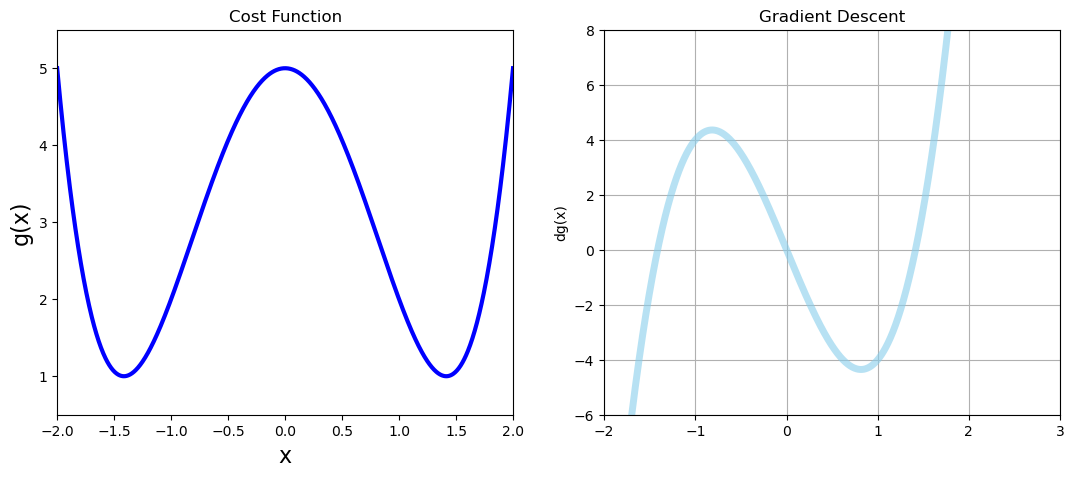

In [111]:
x_2 = np.linspace(-2, 2, 1000);

def g(x):
    return (x**4 - 4*x**2 + 5)

def dg(x):
    return (4*x**3) - (8*x)
    
# Superimpose the gradient descent calculations on plot
plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)
plt.title("Cost Function")
plot(xlim=[-2, 2], ylim=[0.5, 5.5], xlabel="x", ylabel="g(x)", x_n=x_2, function=g)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)
plotGrad("Gradient Descent", xlim = [-2, 3], ylim = [-6, 8], ylabel="dg(x)", x_n=x_2, function=dg, s=False)

In [112]:
#Gradient Descent

def gradientDescent(derivativeFunc, initGuess, mult = 0.02, prec = 0.001):
    new_x = initGuess
    x_list = [new_x]
    slope_list = [derivativeFunc(new_x)]

    for i in range(500):
        prev_x = new_x
        gradient = derivativeFunc(prev_x)
        new_x = prev_x - (mult * gradient)

        step_size = abs(new_x - prev_x)
        x_list.append(new_x)
        slope_list.append(derivativeFunc(new_x))

        if step_size < prec:
            print("loop ran for:", i)
            break

    return new_x, x_list, slope_list

local_min, list_x, deriv_list = gradientDescent(derivativeFunc=dg, initGuess=0.5, mult=0.02, prec=0.001)
print("localmin:", local_min)
print("num of steps:", len(list_x))

loop ran for: 21
localmin: 1.4122375085019094
num of steps: 23


In [113]:
plt.figure(figsize=[20, 5])

local_min, list_x, deriv_list = gradientDescent(derivativeFunc=dg, initGuess=0.1)

# 1 Chart: Cost function
plt.subplot(1, 3, 1)
plt.title("Cost Function")
plot(xlim=[-2, 2], ylim=[0.5, 5.5], xlabel="x", ylabel="g(x)", x_n=x_2, function=g)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)
plotGrad("Gradient Descent", xlim = [-2, 3], ylim = [-6, 8], ylabel="dg(x)", x_n=x_2, function=dg, s=False)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)

TypeError: gradientDescent() missing 2 required positional arguments: 'mult' and 'prec'

<Figure size 2000x500 with 0 Axes>